# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Laura Gagnon-Vos
#### GitHub Repository: https://github.com/lauravos/article-summarizer 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [103]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from spacytextblob.spacytextblob import SpacyTextBlob

!pip list

print('All prereqs installed')


Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.4
contourpy                 1.2.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing       

## Question 1
1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [104]:
#get article
#url = 'https://thelinfieldreview.com/33879/opinion/madame-web-review-an-unfortunate-time-at-the-movies/'
url = 'https://couchsoup.com/madame-web-review-who-let-this-happen/'
response = requests.get(url)

#print(response.text)
print(response.status_code)
print(response.headers['content-type'])

html_content = response.text
with open('article.html', 'w', encoding='utf-8') as file:
    file.write(html_content)


200
text/html; charset=UTF-8


## Question 2
2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [105]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

#open and read html file
with open('article.html', 'rb') as file:
    soup = BeautifulSoup(file, 'html.parser')

#extract text with .get_text()
article_text = soup.get_text()

#print(article_text)

#sentiment analysis
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

doc = nlp(article_text)
print(f'Polarity Score: {doc._.blob.polarity:.2f}')

print('Number of sentences in article: ', len(list(doc.sents)))

Polarity Score: 0.07
Number of sentences in article:  76


## Question 3
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [106]:
#filter out tokens that are punctuation, stopwords, and whitespaces
tokens = [token.text.lower() for token in doc 
          if not token.is_punct
          and not token.is_stop 
          and not token.is_space
          and (token.is_alpha or token.is_digit)]
#get token frequency
freq = Counter(tokens)

#get 5 most frequent tokens
most_common_tokens = freq.most_common(5)

#print 5 most common tokens and frequencies
print('Most common tokens and their frequencies: ')
for tokens, frequency in most_common_tokens:
    print(f'{tokens} : {frequency}')

print()

#print all tokens and frequencies
print('All tokens and their frequencies: ')
for tokens, frequency in freq.items():
    print(f'{tokens} : {frequency}')

Most common tokens and their frequencies: 
film : 16
sony : 9
like : 8
madame : 7
web : 7

All tokens and their frequencies: 
madame : 7
web : 7
review : 2
let : 7
happen : 4
couch : 2
soup : 2
search : 2
insubscribelog : 1
games : 3
reviews : 5
playstation : 2
xbox : 2
pc : 2
nintendo : 2
movies : 7
tv : 3
anime : 3
halo : 1
star : 3
wars : 4
marvel : 4
godzilla : 1
x : 1
kong : 1
videos : 2
screen : 2
smash : 2
atlas : 1
terminal : 1
trailer : 1
talk : 1
game : 4
members : 3
exclusive : 1
home : 1
comics : 2
books : 2
podcasts : 2
store : 2
member : 2
toilet : 1
facebook : 1
twitter : 2
instagram : 1
youtube : 1
tiktok : 1
close : 2
hello : 1
richardsthomas : 1
february : 1
24 : 1
2024 : 6
reviewshello : 1
world : 1
comic : 3
book : 5
getting : 1
bit : 1
bad : 2
rap : 1
lately : 1
dceu : 1
ending : 1
people : 3
turning : 1
mcu : 1
dominance : 1
movie : 1
maybe : 2
sony : 9
swing : 1
help : 3
invested : 1
films : 6
yeah : 1
nah : 1
going : 1
especially : 1
latest : 1
outing : 1
new : 

## Question 4
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [107]:
#lemmatize and filter out tokens that are punctuation, stopwords, and whitespaces
lemmas = [token.lemma_.lower() for token in doc 
          if not token.is_punct
          and not token.is_stop 
          and not token.is_space
        and (token.is_alpha or token.is_digit)]
#get lemma frequency
lfreq = Counter(lemmas)

#get 5 most frequent tokens
most_common_lemmas = lfreq.most_common(5)


#print 5 most common tokens and frequencies
print('Most common lemmas and their frequencies: ')
for lemmas, frequency in most_common_lemmas:
    print(f'{lemmas} : {frequency}')
    
print()

#print all tokens and frequencies
print('All lemmas and their frequencies: ')
for lemmas, frequency in lfreq.items():
    print(f'{lemmas} : {frequency}')

Most common lemmas and their frequencies: 
film : 22
bad : 9
sony : 9
like : 8
madame : 7

All lemmas and their frequencies: 
madame : 7
web : 7
review : 3
let : 7
happen : 5
couch : 2
soup : 2
search : 2
insubscribelog : 1
games : 3
reviews : 4
playstation : 2
xbox : 2
pc : 2
nintendo : 2
movies : 5
tv : 3
anime : 3
halo : 1
star : 4
wars : 4
marvel : 4
godzilla : 1
x : 1
kong : 1
videos : 2
screen : 2
smash : 2
atlas : 1
terminal : 1
trailer : 1
talk : 1
game : 4
members : 1
exclusive : 1
home : 1
comics : 2
books : 2
podcast : 2
store : 2
member : 4
toilet : 1
facebook : 1
twitter : 2
instagram : 1
youtube : 1
tiktok : 1
close : 2
hello : 1
richardsthomas : 1
february : 1
24 : 1
2024 : 6
reviewshello : 1
world : 1
comic : 3
book : 5
movie : 3
get : 3
bit : 1
bad : 9
rap : 1
lately : 1
dceu : 1
ending : 1
people : 3
turn : 1
mcu : 1
dominance : 1
maybe : 2
sony : 9
swing : 1
help : 3
invest : 1
film : 22
yeah : 1
nah : 1
go : 2
especially : 1
late : 1
outing : 1
new : 4
addition : 1


## Question 5
5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

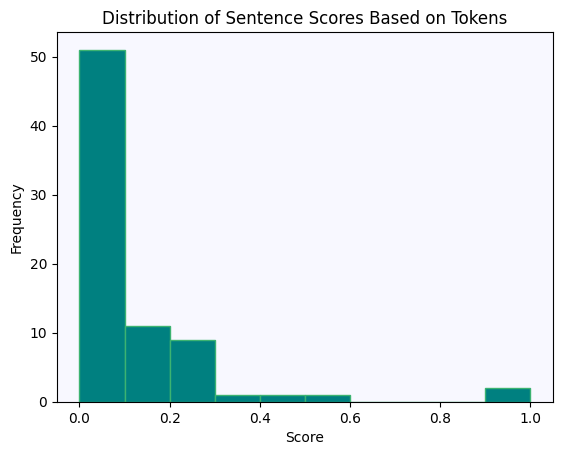

In [108]:
# score_sentence_by_token(sentence, interesting_token)
def score_sentence_by_token(sentence, interesting_token):
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc 
          if not token.is_punct
          and not token.is_stop 
          and not token.is_space
             and (token.is_alpha or token.is_digit)]
    score = sum(token in interesting_token for token in tokens) / len(tokens) 
    return score


#get first sentence
#first_sentence = next(doc.sents).text

#list most common tokens and lemmas
most_common_tokens = ['film', 'sony', 'like', 'madame', 'web']

#score first sentence
#tokenscore = score_sentence_by_token(first_sentence, most_common_tokens)

#print(f'First sentence token score is {tokenscore}')

#score sentences
tsentence_scores = [score_sentence_by_token(sentence.text, most_common_tokens) for sentence in doc.sents]

#histogram
plt.hist(tsentence_scores, color='teal', edgecolor='mediumseagreen', bins=10 )
plt.title('Distribution of Sentence Scores Based on Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.gca().set_facecolor('ghostwhite')


# Most common token scores in the histogram range below approximately 0.15.


## Question 6
6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

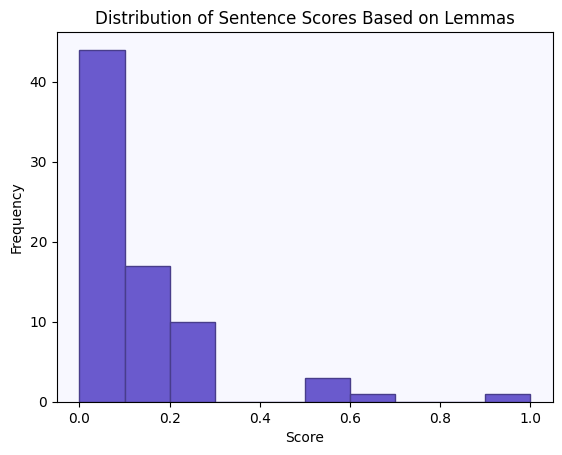

In [109]:
#score_sentence_by_lemma(sentence, interesting_lemmas)
def score_sentence_by_lemma(sentence, interesting_lemma):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc 
          if not token.is_punct
          and not token.is_stop 
          and not token.is_space
             and (token.is_alpha or token.is_digit)]
    score = sum(lemma in interesting_lemma for lemma in lemmas) / len(lemmas) 
    return score

#get first sentence
#first_sentence = next(doc.sents).text

#list most commone lemmas
most_common_lemmas = ['film', 'bad', 'sony', 'like', 'madame']

#lemmascore = score_sentence_by_lemma(first_sentence, most_common_lemmas)

#print(f'First sentence lemma score is {lemmascore}')

#score every sentence 
lsentence_scores = [score_sentence_by_lemma(sentence.text, most_common_lemmas) for sentence in doc.sents]

#histogram
plt.hist(lsentence_scores, color='slateblue', edgecolor='darkslateblue', bins=10 )
plt.title('Distribution of Sentence Scores Based on Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.gca().set_facecolor('ghostwhite')

#Most common lemma scores are similar to that shown in the token histogram above, with the range most commonly below approximately 0.15.

## Question 7
7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.13
* Cutoff Score (lemmas): 0.15

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [110]:
import numpy as np

tokenarray = np.array(tsentence_scores)
cutoff_token_score = np.percentile(tokenarray, 75)

print('Token cutoff score: ', cutoff_token_score)

lemmaarray = np.array(lsentence_scores)
cutoff_lemma_score = np.percentile(lemmaarray, 75)

print('Lemma cutoff score: ', cutoff_lemma_score)


Token cutoff score:  0.125
Lemma cutoff score:  0.1456043956043956


## Question 8
8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [111]:
#token_cutoff = 0.13
#lemma_cutoff = 0.15

above_token_cutoff = []

#score sentences
for sentence in doc.sents:
    tokenscore = score_sentence_by_token(sentence.text, most_common_tokens)
    #print(tokenscore)
    if tokenscore > cutoff_token_score:
        above_token_cutoff.append(sentence.text)
        #print("added")

#print(above_token_cutoff)
print(' '.join(above_token_cutoff))
#tsentence_scores = [score_sentence_by_token(sentence.text, most_common_tokens) for sentence in doc.sents]











Madame Web Review: Who Let This Happen? Yeah, nah, that was never going to happen, especially with their latest outing, Madame Web. It at Least Does Something Right
They’re as shocked as I am at the quality of this film. (Sony)




Let’s start with the things I enjoyed about this film (there wasn’t much if that wasn’t already obvious). It also sucks because they cast this film perfectly with almost every actor nailing the look and vibe of the characters, and they’re stuck in this dumpster fire of a film.



 (Sony)
 It’s time to get into why this film is one of the worst I’ve seen in a while. Madame Web is set in 2003, and the PSP came out in 2004, so this shouldn’t be possible. How does Sony, of all studios, mess this up?




Hands down, the worst part of this film, though, is the villain, Ezekiel (Tahar Rahim). How Did This Happen
Protecting the children from this film. (Sony)
I may have just spent a decent amount of time shitting on this film, but who even let something lik

## Question 9
9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [112]:
doc = nlp(str(above_token_cutoff))
print(f'Polarity Score of Summary: {doc._.blob.polarity:.2f}')

print(f'Number of Sentences of Summary: {len(above_token_cutoff)}')

Polarity Score of Summary: -0.12
Number of Sentences of Summary: 17


## Question 10
10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [113]:
#token_cutoff = 0.13
#lemma_cutoff = 0.15

above_lemma_cutoff = []

#score sentences
for sentence in doc.sents:
    lemmascore = score_sentence_by_lemma(sentence.text, most_common_lemmas)
    #print(lemmascore)
    if lemmascore > cutoff_lemma_score:
        above_lemma_cutoff.append(sentence.text)
        #print("added")

#print(above_cutoff)
print(' '.join(above_lemma_cutoff))
#tsentence_scores = [score_sentence_by_token(sentence.text, most_common_tokens) for sentence in doc.sents]


', 'It also sucks because they cast this film perfectly with almost every actor nailing the look and vibe of the characters, and they’re stuck in this dumpster fire of a film.\n\n\n\n', '(Sony)\n', 'It’s time to get into why this film is one of the worst I’ve seen in a while. ', 'Madame Web is set in 2003, and the PSP came out in 2004, so this shouldn’t be possible.', 'How does Sony, of all studios, mess this up?\n\n\n\n\nHands down, the worst part of this film, though, is the villain, Ezekiel (Tahar Rahim). ', 'How Did This Happen\nProtecting the children from this film. ', '(Sony)\nI may have just spent a decent amount of time shitting on this film, but who even let something like this come to fruition?', 'You can tell just by watching the film that it was created by a committee that doesn’t understand what they’re doing. ', 'Sony has done this before with another one of their films, Morbius.', '(Sony)\nMadame Web is the worst film I’ve seen this year. ', 'The few bright spots do lit

## Question 11
11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [114]:
doc = nlp(str(above_lemma_cutoff))
print(f'Polarity Score of Summary: {doc._.blob.polarity:.2f}')

print(f'Number of Sentences of Summary: {len(above_lemma_cutoff)}')

Polarity Score of Summary: -0.19
Number of Sentences of Summary: 6


## Question 12
12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

### Initial Polarity Score: 0.07
This score is very close to neutral, though it leans slightly more positive. Overall, the article chosen was a pretty scathing review of a movie, but the site had some ads to other articles at the bottom, so that may have affected the score. 

### Summary Token Score: -0.13
The score for the token summary is more negative, which makes sense given that the summary has sentences that are more relative to the actual content of the article since they contain more of the common tokens. 

### Summary Lemma Score: -0.23
The score for the lemma summary is even more negative than that of the token summary. Given that the second most common lemma is 'bad' (in regard to the movie review), I'd say it makes total sense that the polarity leans negative


## Question 13
13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I believe the lemma summary captures the essence of the article the best. It seems to have filtered out the majority of the irrelevant, and is a better representation of the snarky, dissatified tone and content of the article than the other options. I do overall believe that the score should be more negative, but I think the lemma summary score is the best representation available. 

In [102]:
!jupyter nbconvert --to html article-summarizer.ipynb 

[NbConvertApp] Converting notebook article-summarizer.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 384834 bytes to article-summarizer.html
